In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import mal_cfr_data.plot as mcd_plt
import mal_cfr_data.tournament as mcd_tournament

mcd_plt.set_plt_params()
div_color_palette = mcd_plt.diverging_color_palette()
seq_color_palette = mcd_plt.sequential_color_palette()

/Users/morrill/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [46]:
data = mcd_tournament.Data.load()
data.data

,game_tag,sampler,seed,mode,row_alg,col_alg,value,t
0,kuhn_4p,null,None,fixed,CFR,CFR,2.775560e-17,0
1,kuhn_4p,null,None,fixed,CFR,A-CFR,2.775560e-17,0
2,kuhn_4p,null,None,fixed,CFR,CFR_IN,2.775560e-17,0
3,kuhn_4p,null,None,fixed,CFR,A-CFR_IN,2.775560e-17,0
4,kuhn_4p,null,None,fixed,CFR,BPS-CFR,2.775560e-17,0
...,...,...,...,...,...,...,...,...
146995,tiny_hanabi,null,None,fixed,BR,TIPS-CFR,9.000000e+00,99
146996,tiny_hanabi,null,None,fixed,BR,IPS-CFR,8.000000e+00,99
146997,tiny_hanabi,null,None,fixed,BR,PI,8.000000e+00,99
146998,tiny_hanabi,null,None,fixed,BR,greed_punisher,8.000000e+00,99


In [87]:
df = data.data.query(
    f'game_tag == "tiny_bridge" & mode == "fixed" & t < 100\
    & col_alg != ["PI", "greed_punisher", "FP"]\
    & row_alg != ["PI", "greed_punisher", "FP", "BR"]\
    & row_alg == ["CFR", "BPS-CFR", "TIPS-CFR", "IPS-CFR"]'
).pivot(
    index='col_alg', columns=['t', 'row_alg'], values='value').mean().unstack()
df = df.cumsum()
df

row_alg,BPS-CFR,CFR,IPS-CFR,TIPS-CFR
t,,,,
0,-12.329400,-12.329400,-12.329400,-12.329400
1,-0.186757,-0.186757,-0.098900,2.051200
2,17.246414,17.233486,17.471386,20.428157
3,36.812029,36.785014,37.105100,40.231700
4,56.787557,56.746914,57.126271,60.340486
...,...,...,...,...
95,1937.985286,1937.912300,1938.468257,1941.938643
96,1958.722229,1958.649243,1959.205200,1962.675586
97,1979.459171,1979.386186,1979.942143,1983.412529


/Users/morrill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


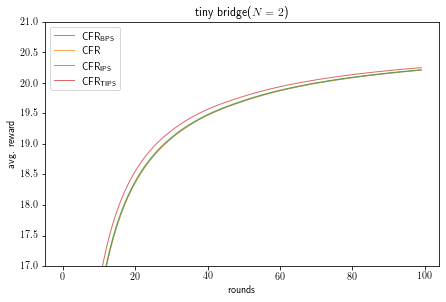

In [88]:
_df = df.sort_index(axis=1, key=mcd_tournament.alg_sort_keys).div(
    df.index.to_series() + 1.0, 0
)
# plt.figure(figsize=(10, 5))
for alg in df.columns:
    plt.plot(
        _df.index.to_numpy(),
        _df[alg],
        lw=1,
        alpha=0.7,
        label=mcd_tournament.alg_label(alg)
    )
plt.ylim([17, 21])
plt.xlabel('rounds')
plt.ylabel('avg. reward')
plt.title('tiny bridge($N = 2$)')
plt.legend()
plt.tight_layout(0)
plt.savefig('results/learning_curve.tiny_bridge.sep29_2020.pdf')

/Users/morrill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


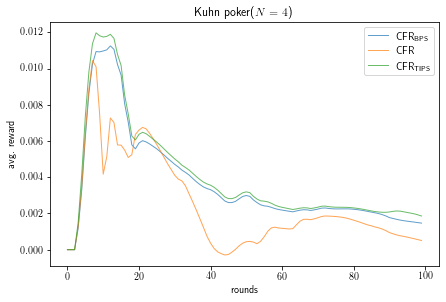

In [89]:
df = data.data.query(
    f'game_tag == "kuhn_4p" & mode == "fixed" & t < 100\
    & col_alg != ["PI", "greed_punisher", "FP"]\
    & row_alg != ["PI", "greed_punisher", "FP", "BR"]\
    & row_alg == ["CFR", "BPS-CFR", "TIPS-CFR"]'
).pivot(
    index='col_alg', columns=['t', 'row_alg'], values='value').mean().unstack()
df = df.cumsum()
_df = df.sort_index(axis=1, key=mcd_tournament.alg_sort_keys).div(
    df.index.to_series() + 1.0, 0
)
# plt.figure(figsize=(10, 5))
for alg in df.columns:
    plt.plot(
        _df.index.to_numpy(),
        _df[alg],
        lw=1,
        alpha=0.7,
        label=mcd_tournament.alg_label(alg)
    )
# plt.ylim([17, 21])
plt.xlabel('rounds')
plt.ylabel('avg. reward')
plt.title('Kuhn poker($N = 4$)')
plt.legend()
plt.tight_layout(0)
plt.savefig('results/learning_curve.kuhn_4p.sep29_2020.pdf')

/Users/morrill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


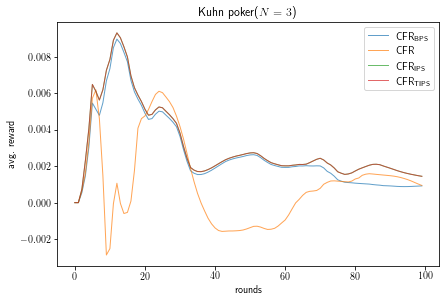

In [91]:
df = data.data.query(
    f'game_tag == "kuhn_3p" & mode == "fixed" & t < 100\
    & col_alg != ["PI", "greed_punisher", "FP"]\
    & row_alg != ["PI", "greed_punisher", "FP", "BR"]\
    & row_alg == ["CFR", "BPS-CFR", "TIPS-CFR", "IPS-CFR"]'
).pivot(
    index='col_alg', columns=['t', 'row_alg'], values='value').mean().unstack()
df = df.cumsum()
_df = df.sort_index(axis=1, key=mcd_tournament.alg_sort_keys).div(
    df.index.to_series() + 1.0, 0
)
# plt.figure(figsize=(10, 5))
for alg in df.columns:
    plt.plot(
        _df.index.to_numpy(),
        _df[alg],
        lw=1,
        alpha=0.7,
        label=mcd_tournament.alg_label(alg)
    )
# plt.ylim([17, 21])
plt.xlabel('rounds')
plt.ylabel('avg. reward')
plt.title('Kuhn poker($N = 3$)')
plt.legend()
plt.tight_layout(0)
plt.savefig('results/learning_curve.kuhn_3p.sep29_2020.pdf')

/Users/morrill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


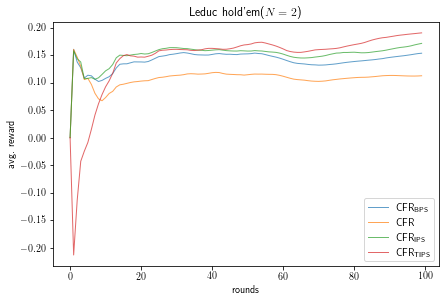

In [92]:
df = data.data.query(
    f'game_tag == "leduc" & mode == "fixed" & t < 100\
    & col_alg != ["PI", "greed_punisher", "FP"]\
    & row_alg != ["PI", "greed_punisher", "FP", "BR"]\
    & row_alg == ["CFR", "BPS-CFR", "TIPS-CFR", "IPS-CFR"]'
).pivot(
    index='col_alg', columns=['t', 'row_alg'], values='value').mean().unstack()
df = df.cumsum()
_df = df.sort_index(axis=1, key=mcd_tournament.alg_sort_keys).div(
    df.index.to_series() + 1.0, 0
)
# plt.figure(figsize=(10, 5))
for alg in df.columns:
    plt.plot(
        _df.index.to_numpy(),
        _df[alg],
        lw=1,
        alpha=0.7,
        label=mcd_tournament.alg_label(alg)
    )
# plt.ylim([17, 21])
plt.xlabel('rounds')
plt.ylabel('avg. reward')
plt.title("Leduc hold'em($N = 2$)")
plt.legend()
plt.tight_layout(0)
plt.savefig('results/learning_curve.leduc.sep29_2020.pdf')

In [3]:
# plt.figure(figsize=(10, 3))
# mcd_tournament.heatmap(
#     mcd_tournament.without_br_row(data.fixed_table('kuhn_3p')),
#     cmap=div_color_palette
# )

In [4]:
# for seed in data.all_seeds():
#     if not np.isnan(seed):
#         plt.figure(figsize=(10, 3))
#         mcd_tournament.heatmap(
#             mcd_tournament.without_br_row(
#                 data.shuffled_table('kuhn_3p', seed)) * 1000,
#             cmap=div_color_palette)
#         plt.show()

In [5]:
# (data.shuffled_table_by_seed("kuhn_3p") * 1000).std().max()

In [6]:
# (data.max_abs_diff_from_mean("kuhn_3p") * 1000).max()

leduc
kuhn_3p
tiny_bridge
tiny_hanabi


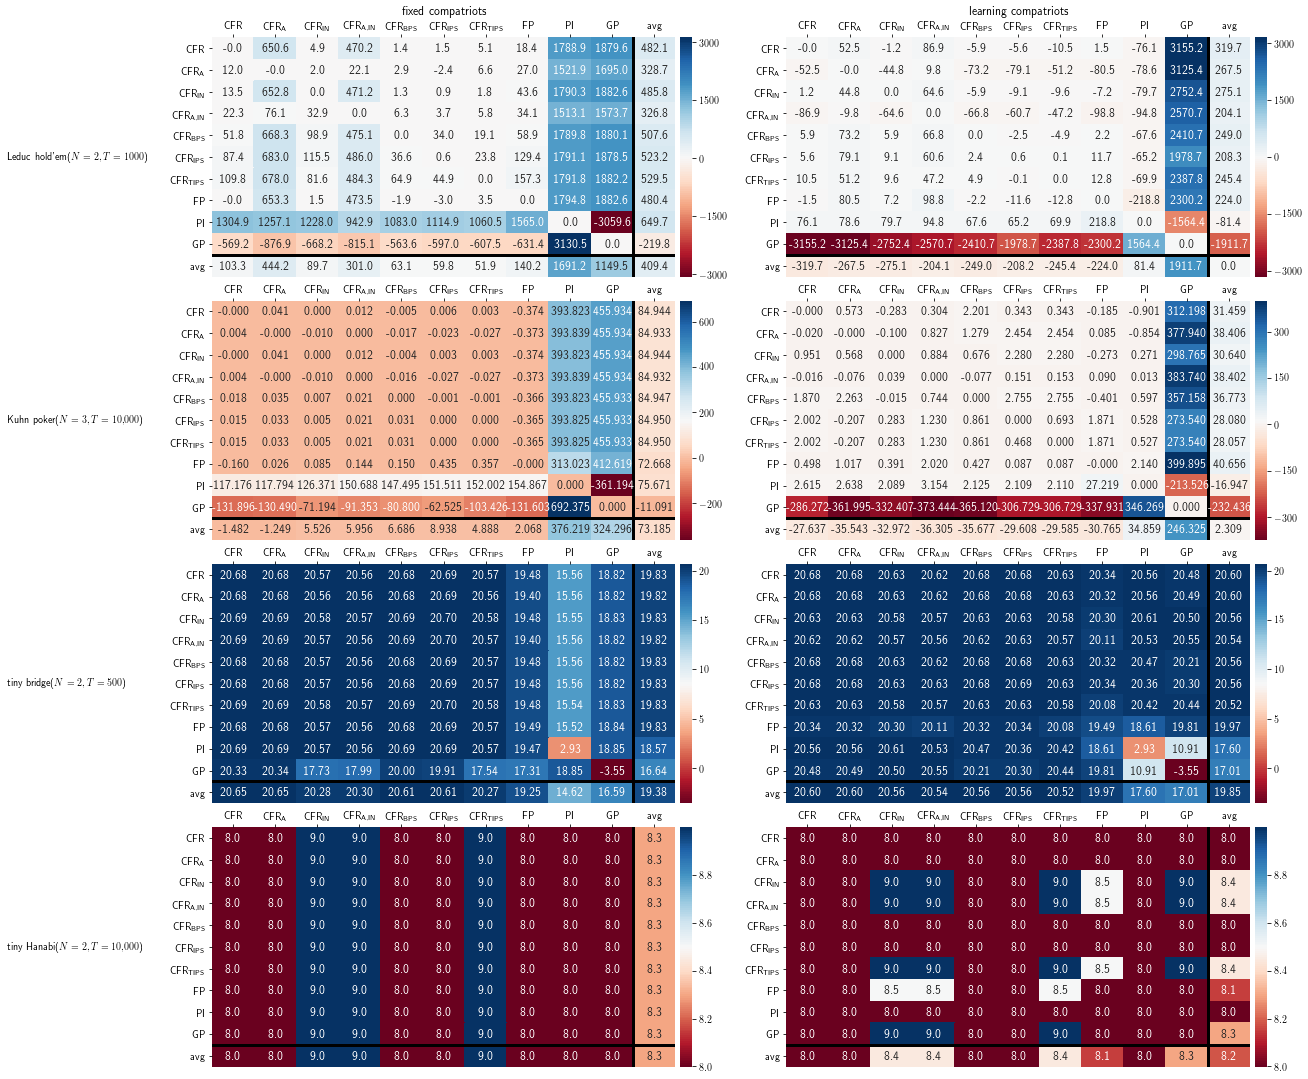

In [7]:
num_cols = 2
fig, axes_list = plt.subplots(
    len(data.games()),
    num_cols + 1,
    squeeze=False,
    figsize=(18, 3.7 * len(data.games())),
    gridspec_kw={'width_ratios': [0.25, 1, 1]})
axes_list[0, 1].set_title('fixed compatriots')
axes_list[0, 2].set_title('learning compatriots')
for i, game in enumerate(data.games()):
    axes_list[i, 2].sharex(axes_list[i, 1])
    axes_list[i, 2].sharey(axes_list[i, 1])
#     axes_list[i, 2].yaxis.set_visible(False)

    print(game)
    
    scale = 1000 if (
        game == 'kuhn_3p'
        or game == 'leduc'
        or game == 'kuhn_4p') else 1
    if (game == 'goofspiel'
        or game == 'random_goofspiel'
        or game == 'tiny_bridge'):
        fmt = "0.2f"
    elif game == 'kuhn_3p':
        fmt = "0.3f"
    else:
        fmt = "0.1f"
    
    mcd_tournament.heatmap(
        mcd_tournament.without_br_row(data.fixed_table(game)) * scale,
        fmt=fmt,
        ax=axes_list[i, 1],
        cmap=div_color_palette,
        cbar_kws={'fraction': 0.05, 'pad': 0.01})
#     mcd_tournament.heatmap(
#         mcd_tournament.without_br_row(data.avg_shuffled_table(game)) * scale,
#         fmt=fmt,
#         ax=axes_list[i, 1],
#         cmap=div_color_palette,
#         cbar_kws={'fraction': 0.05, 'pad': 0.01})
    mcd_tournament.heatmap(
        data.sim_table(game) * scale,
        fmt=fmt,
        ax=axes_list[i, 2],
        cmap=div_color_palette,
        cbar_kws={'fraction': 0.05, 'pad': 0.01})
    
    axes_list[i, 0].axis('off')
    axes_list[i, 0].text(0, 0.5, mcd_tournament.game_label(game),
                         horizontalalignment='left',
                         verticalalignment='center',
                         transform=axes_list[i, 0].transAxes)
    
plt.tight_layout(pad=0)
plt.subplots_adjust(wspace=0.22, hspace=0.1)
fig.savefig(f'results/heatmaps.aug21_2020.pdf')
plt.show()

In [8]:
# fig, axes_list = plt.subplots(
#     2,
#     1,
#     sharex=True,
#     sharey=True,
#     squeeze=True,
#     figsize=(13.5, 3.5 * 3))
# mcd_tournament.heatmap_avg(
#     mcd_tournament.without_br_row(data.fixed_avg_table()),
#     ax=axes_list[0],
#     cmap=div_color_palette,
#     cbar_kws={'fraction': 0.05, 'pad': 0.01},
#     fmt="0.3f"
# )
# # mcd_tournament.heatmap_avg(
# #     mcd_tournament.without_br_row(data.shuffled_avg_table()),
# #     ax=axes_list[1],
# #     cmap=div_color_palette,
# #     cbar_kws={'fraction': 0.05, 'pad': 0.01},
# #     fmt="0.3f"
# # )
# mcd_tournament.heatmap_avg(
#     mcd_tournament.without_br_row(data.sim_avg_table()),
#     ax=axes_list[1],
#     cmap=div_color_palette,
#     cbar_kws={'fraction': 0.05, 'pad': 0.01},
#     fmt="0.3f"
# )
# plt.tight_layout(0)
# plt.subplots_adjust(hspace=0.25)
# fig.savefig(f'results/avg_heatmaps.aug22_2020.pdf')
# plt.show()